# **Urban Data Science - Final Project : EV Charging Station in Los Angeles**
### Kongpob Leemingsawat
### Date: 2 June 2023
------------
# **Directory**
------------

**1. Project Overview**

**2. Data Request**

**3. Merging Data**

**4. Data Analysis**

**5. Machine Learning Model**

**6. Conclusion**

---------
# I. Project Overview
---------

As the electric vehicle (EV) market expands, there is an increasing effort from both public and private sectors to install additional EV charging stations in order to meet the growing demand. It is crucial to comprehend the essential attributes of EV charging stations, as well as their location characteristics, in order to gain insights into the installation patterns. In this study, we will concentrate on the Los Angeles area, aiming to develop a predictive model that identifies the key factors contributing to the high concentration of EV charging stations. Furthermore, we will explore potential areas for improvement in the existing infrastructure.

---------
# II. Data Request
---------

#### Description: 
To obtain Electric Vehicle (EV) Charging Station data for Los Angeles from the National Renewable Energy Laboratory (1), follow these instructions:

1. Import the calenviroscreen dataset and extract a separate list containing only the zip codes in Los Angeles county. 
2. Develop a function that includes the necessary parameters to request data from the National Renewable Energy Laboratory.
3. Utilize a loop to request data from the National Renewable Energy Laboratory.
4. Compile a master dataset that combines all the datasets obtained in step 3.


#### Reference: 
1. National Renewable Energy Laboratory: [Document](https://developer.nrel.gov/docs/transportation/alt-fuel-stations-v1/all/#request-parameters) 
2. Calenviroscreen : [Document](https://oehha.ca.gov/calenviroscreen)

Note: [Here](https://github.com/Kongpob13/URBN-PL-213-Final-Project/blob/92d2da3b4115bcecda24494970fc9e0824bdadb2/Data/calenviroscreen40resultsdatadictionary_F_2021.pdf) is a reference document for calenviroscreen

#### Code Reference: 
[Code](https://github.com/Kongpob13/URBN-PL-213-Final-Project/blob/4ae329ea4d8f1735b0832883cbdc72960aabbe33/1_DataRequest/DataRequest.ipynb)

--------
# III. Merging Data
--------

#### Description: 

1. After we have sucessfully retrieved information from National Renewable Energy Laboratory and created a dataset(1), we will merge the dataset(1) with: 
* Calenviroscreen - Source : [Document](https://oehha.ca.gov/calenviroscreen)
* Highways Dataset - Source: [Document](https://gisdata-caltrans.opendata.arcgis.com/datasets/1f71fa512e824ff09d4b9c3f48b6d602_0/explore?location=33.953319%2C-117.793756%2C9.93)
* Freeway Dataset - Source: [Document](https://koordinates.com/layer/96008-los-angeles-county-freeways/)
* Census Dataset (Source: American Community Survey)
2. We will create a characteristic dataset for future analysis. Thus, we will merge Calenviroscreen with Highways, Freeway, and Census data. Moreover, we will also include additional columns, such as number of EV stations, number of highways, and number of road, to this dataset (same as above dataset)

#### Approach: 
1. Import necessary data set mentioned above 
2. Merge data set 
3. Create additional columns for Machine Learning Model
4. Drop duplicate and export data set

#### Reference Code: 
1. To create completed EV Station Dataset: [Code](https://github.com/Kongpob13/URBN-PL-213-Final-Project/blob/4ae329ea4d8f1735b0832883cbdc72960aabbe33/2_CreateDataset/CreateDataset.ipynb)
2. To create Los Angeles County Characteristics Dataset, we simply follow the same approach from the above document


---------
# IV. Data Analysis
---------

### Description: 
In order to analyze and visualize the data, we will be using two datasets: 
1. EV Charging Stations Dataset (Completed dataset from above) 
2. CA Boundary Dataset (Source: [Document](https://geohub.lacity.org/datasets/10f1e37c065347e693cf4e8ee753c09b/explore?location=33.803753%2C-118.298788%2C8.61))

In [3]:
# Library

import numpy as np

import pandas as pd

import geopandas as gpd

import matplotlib.pyplot as plt

import seaborn as sns 

import warnings 
warnings.filterwarnings("ignore")

# Removes the limit for the number of displayed columns

pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows

pd.set_option("display.max_rows", 200)

### Import Data

In [ ]:
# Import CA Boundary Data

boundary_LA = gpd.read_file("Data/County_Boundary.geojson")

# Import Highway Data
highway_LA = gpd.read_file("Data/National_Highway_System.geojson")

# filter LA county 
highway_LA = highway_LA[highway_LA['County'] == 'Los Angeles']

# Import Roads Data

road_LA = gpd.read_file("Data/LA_roads.zip")

# Import California Characteristics Data

cal_LA = pd.read_csv("Data/LAcounty_Demograph.csv")

# Import EV Charging Station Data

ev_df = pd.read_csv("Data/completed_dataset.csv")

ev_df.head(2)

Unnamed: 0  index    id                     station_name   open_date  \
0           0      0  1517         LADWP - Truesdale Center  1999-10-15   
1           1      1  1519  LADWP - West LA District Office  2020-02-28   

  status_code fuel_type_code                  ev_connector_types  \
0           E           ELEC  ['CHADEMO', 'J1772', 'J1772COMBO']   
1           E           ELEC                           ['J1772']   

      ev_network groups_with_access_code access_days_time  \
0  Non-Networked                 Private   Fleet use only   
1  Non-Networked                 Private                0   

          street_address         city    zip state   longitude   latitude  \
0     11797 Truesdale St   Sun Valley  91352    CA -118.387971  34.248319   
1  1394 S Sepulveda Blvd  Los Angeles  90024    CA -118.448504  34.052542   

                                      geometry  index_right       Tract  \
0  POINT (-118.3879713743439 34.2483191527193)           61  6037121102   
1                POINT (-118.448504 34.052542)         1063  6037701100   

     ZIP       County                               ApproxLoc  TotPop19  \
0  91352  Los Angeles                             Los Angeles      2479   
1  90049  Los Angeles  Unincorporated Los Angeles County area      1101   

     CIscore   CIscoreP     Ozone     OzoneP      PM2_5    PM2_5_P  DieselPM  \
0  46.994496  84.430156  0.065915  95.270691  11.353984  58.543871  0.183486   
1  38.717942  73.134140  0.049432  59.850653  11.655497  64.617299  0.562748   

   DieselPM_P  Pesticide  PesticideP      Tox_Rel  Tox_Rel_P      Traffic  \
0   58.942128   0.000000    0.000000   827.866028  60.965241   992.603908   
1   91.810828   0.004307    9.413793  1471.183329  72.755689  4040.448172   

   TrafficP    DrinkWat  DrinkWatP        Lead      Lead_P  Cleanup  \
0   57.4125  726.638249  83.127264   61.880579   68.355388     81.3   
1   98.7875  440.638034  52.716373 -999.000000 -999.000000     16.1   

    CleanupP  GWThreat  GWThreatP  HazWaste  HazWasteP  ImpWatBod  ImpWatBodP  \
0  98.749533     22.95  71.990702     4.405  97.418928        7.0   66.736665   
1  76.801045     17.50  64.220488     1.235  88.232958        0.0    0.000000   

   SolWaste  SolWasteP   PollBurd  PolBurdSc   PolBurdP  Asthma    AsthmaP  \
0      63.4  99.977090  69.209618   8.450481  98.095831   57.99  66.787139   
1       6.3  80.549828  63.506206   7.754095  94.660859   13.61   2.629611   

   LowBirtWt    LowBirWP  Cardiovas  CardiovasP  Educatn    EducatP  \
0       3.97   25.904542      11.88   45.077268     30.7  80.916224   
1    -999.00 -999.000000       7.60   10.817547     22.4  68.969881   

   Ling_Isol  Ling_IsolP  Poverty  PovertyP  Unempl    UnemplP  HousBurd  \
0        2.3   18.107998     44.7  75.71608     4.3  35.020822      35.8   
1     -999.0 -999.000000     83.9  99.68593    41.1  99.986986    -999.0   

    HousBurdP    PopChar  PopCharSc   PopCharP  Child_10  Pop_10_64  \
0   96.730038  53.610608   5.561163  55.421079    8.6325    73.7394   
1 -999.000000  48.135589   4.993225  47.566818    2.8156    77.7475   

   Elderly65  Hispanic    White  AfricanAm  NativeAm  OtherMult    Shape_Leng  \
0    17.6281   48.4873  45.9459     0.0000       0.0     1.4925  11461.974301   
1    19.4369   26.5213  36.7847    22.4342       0.0     4.6322   8588.373341   

     Shape_Area    AAPI  Median HH Income  n_ev  n_roads  n_highways  \
0  7.542610e+06  4.0742           48750.0     2       72         5.0   
1  2.532709e+06  9.6276           45536.0     2       61        14.0   

   dist_to_rd  dist_to_hw  n_rd_buffer  n_hw_buffer  
0   50.553886  912.156136            4          NaN  
1   10.353718    0.966105           50         14.0

### Examine Open Date

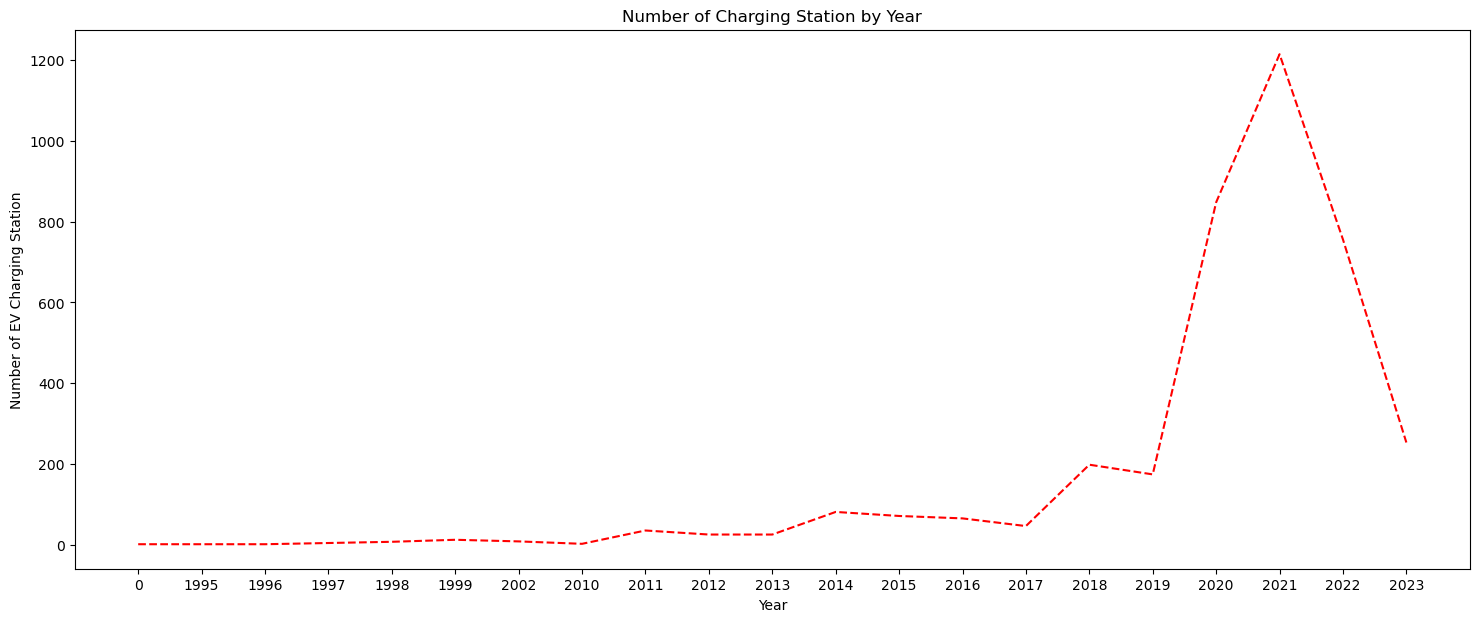

In [ ]:
# create a dataframe to contain open year 

ev_df['open_year'] = pd.to_datetime(ev_df['open_date'], errors='coerce').dt.year.fillna(0).astype(int).astype('str')

ev_year_count = ev_df['open_year'].value_counts()

ev_year_count_df = pd.DataFrame({'year': ev_year_count.index, 'count': ev_year_count.values})

# sort by year in descending order

ev_year_count_df = ev_year_count_df.sort_values(by='year', ascending=True)

# create a line plot

fig, ax = plt.subplots(figsize=(18, 7))

x = ev_year_count_df["year"]

y = ev_year_count_df["count"]

plt.plot(x, y, linestyle='--', color='r',)

# add labels and title

plt.xlabel('Year')

plt.ylabel('Number of EV Charging Station')

plt.title('Number of Charging Station by Year')

# display the plot

plt.show()

#### Observation:
The number of opened electric vehicle (EV) stations has shown a consistent increase since 1995, with a significant surge observed between 2019 and 2022. Notably, this period coincided with the outbreak of the Covid-19 pandemic in 2020, during which the number of EV charging stations witnessed a substantial rise. It is plausible to consider that the Covid-19 pandemic may have contributed to this increase, as it potentially drove up gas prices, prompting individuals to transition to using EV cars. However, it is important to note that a correlation between these factors does not necessarily imply causation. Further analysis is required to establish a more conclusive understanding of the relationship between the Covid-19 pandemic, gas prices, and the adoption of EV cars.

### Examine Number of Charging Stations by Zip Code

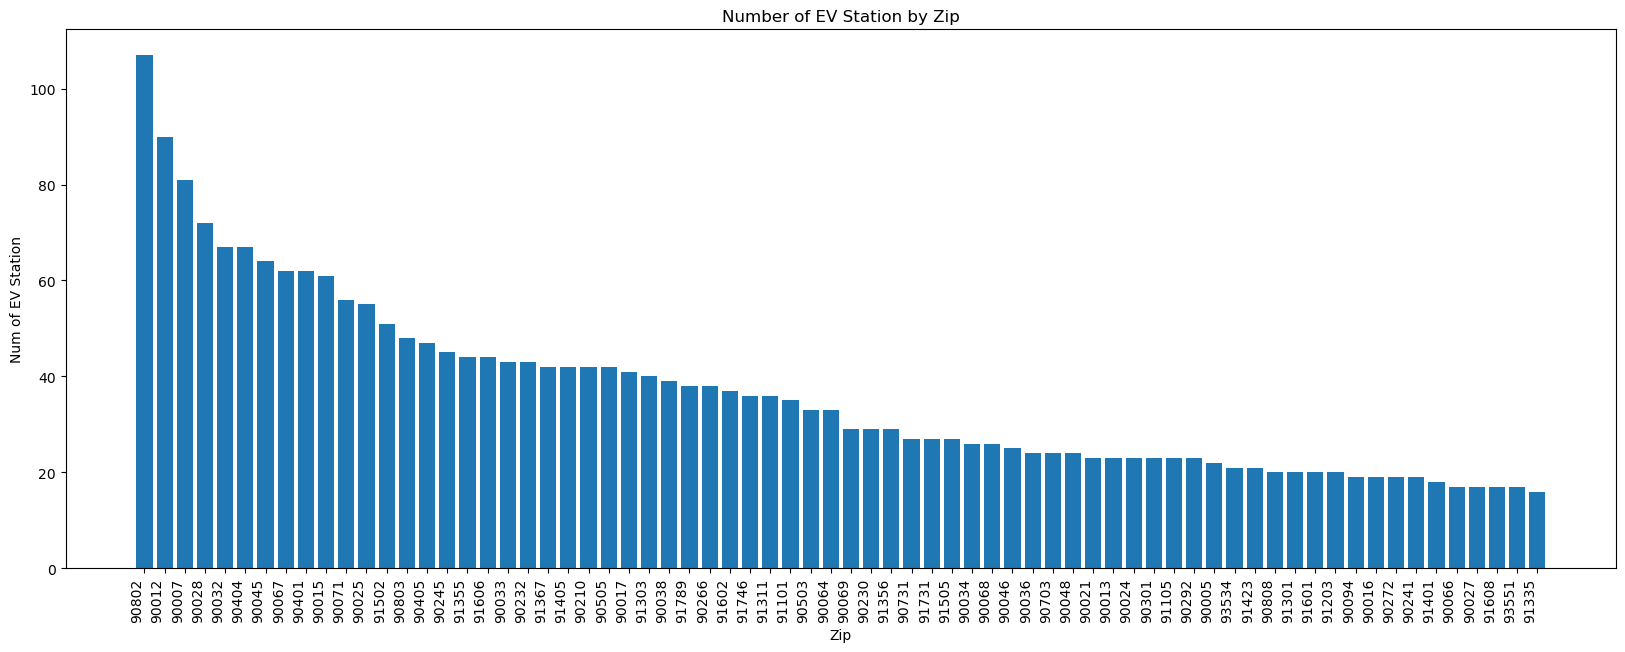

In [ ]:
# create a dataframe to count number of charging station by zip code

ev_zip_count = ev_df['zip'].value_counts()

ev_zip_count_df = pd.DataFrame({'zip': ev_zip_count.index, 'count': ev_zip_count.values})

# Plot

fig, ax = plt.subplots(figsize=(20, 7))

ev_zip_count_dfs = ev_zip_count_df[ev_zip_count_df["count"] > 15] # Filter the zip code with more than 15 stations

x = ev_zip_count_dfs["zip"].astype('string')

y = ev_zip_count_dfs["count"]

plt.bar(x,y)

plt.xlabel('Zip')

plt.ylabel('Num of EV Station')

plt.xticks(rotation=90, ha='right')

plt.title('Number of EV Station by Zip')

plt.show()

#### Observation
* 90802 : Long Beach
* 90012 : Los Angeles (Downtown Civic Center, Chinatown, Arts District, Bunker Hill, Historic Core, Little Tokyo)
* 90007 : Los Angeles (Southeast Los Angeles, Univerity Park)
* 90028 : Los Angeles (Hollywood)
* 90032 : Los Angeles (El Sereno, Monterey Hills, University Hills)
* 90404 : Santa Monica

The majority of electric vehicle (EV) stations are situated in downtown areas, reflecting their strategic placement in highly frequented locations that attract a significant volume of people.

Reference: [Website](https://www.laalmanac.com/communications/cm02a90001-90899.php)

### Examine Location of EV Charging Stations

In [ ]:
## Convert ev_df to geodataframe ##

# we don't need column = unnamed:0
ev_df = ev_df.drop('Unnamed: 0', axis=1)

# create a geodata frame 
ev_gdf = gpd.GeoDataFrame(ev_df, geometry = gpd.points_from_xy(ev_df.longitude, ev_df.latitude, crs = 'EPSG: 4326'))

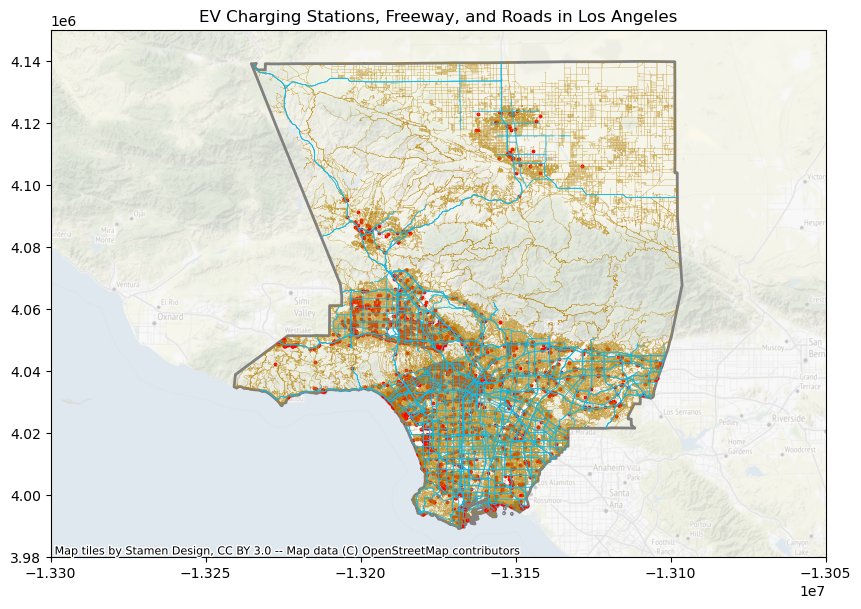

In [ ]:
import contextily as ctx

# Create blank figure and axis objects
fig, ax = plt.subplots(figsize=(10,10))

# Plot LA Roads
road_LA.to_crs('EPSG:3857').plot(ax=ax, color='darkgoldenrod', alpha=1, linewidth=0.2)

# Plot LA Highway
highway_LA.to_crs('EPSG:3857').plot(ax=ax, color='deepskyblue', alpha=1, linewidth=0.5)

# Plot the LA county boundary
boundary_LA.to_crs('EPSG:3857').plot(ax=ax, edgecolor='grey', facecolor='none', alpha=1, linewidth=2)

# Plot the ev_gdf data. ax=ax means we plot it on the axes that we just created
ev_gdf.to_crs('EPSG:3857').plot(color="red", ax=ax, markersize = 3)

# Set the x-axis and y-axis limits to zoom out slightly
ax.set_xlim(-13300000, -13050000)
ax.set_ylim(3980000, 4150000)

ax.set_title('EV Charging Stations, Freeway, and Roads in Los Angeles')

ctx.add_basemap(ax=ax, alpha=0.3) # 50% opacity

plt.show()

#### Observation: 
The distribution of electric vehicle (EV) stations is predominantly clustered in regions characterized by a dense network of highways and roads, indicating a strong correlation between the presence of EV stations and well-connected transportation infrastructure. This observation suggests that the availability and accessibility of high-traffic routes play crucial roles in determining the spatial distribution and construction of EV stations.

### Examine EV Charging Stations & Distributions 

In [ ]:
## Convert cal_LA to geodataframe ##

from shapely import wkt

# Convert the 'geometry' column from WKT to Shapely geometry objects

cal_LA['geometry'] = cal_LA['geometry'].apply(wkt.loads)

# Convert the DataFrame to a GeoDataFrame

cal_LA = gpd.GeoDataFrame(cal_LA, crs='epsg:3310')

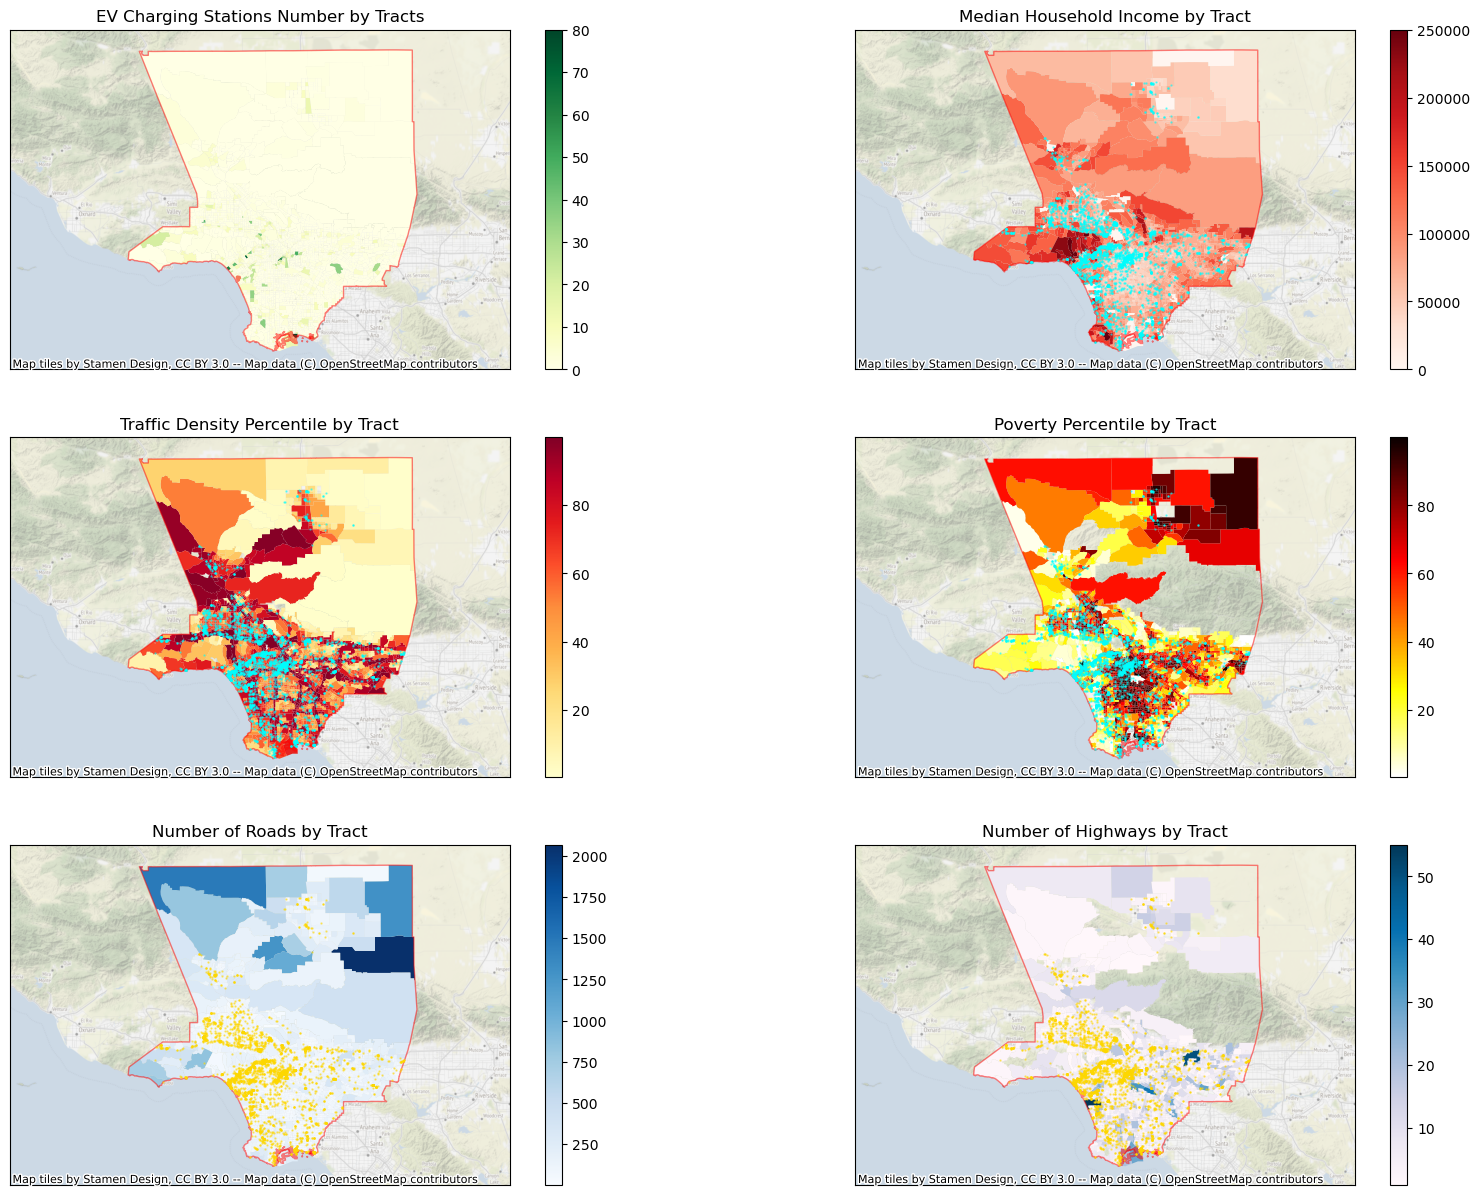

In [ ]:
# Plot
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20,15))

# Electric Charging Stations Number by Tracts in LA County
cal_LA.to_crs('EPSG:3857').plot('n_ev', ax=axs[0,0], cmap='YlGn',legend=True)
boundary_LA.to_crs('EPSG:3857').plot( ax=axs[0,0], edgecolor='red', facecolor='none', alpha=0.5, linewidth=1)
axs[0,0].set_xlim(-13300000, -13050000)
axs[0,0].set_ylim(3980000, 4150000)
ev_gdf.to_crs('EPSG:3857').plot(ax=axs[0,1], markersize = 0.5, legend=True, alpha=0.5, color='aqua' )
ctx.add_basemap(ax=axs[0,0], alpha=0.5) # 50% opacity
axs[0,0].set_title('EV Charging Stations Number by Tracts')
axs[0,0].set_xticks([])
axs[0,0].set_yticks([])

# Median Income by Tract
cal_LA[cal_LA['Median HH Income']>=0].to_crs('EPSG:3857').plot('Median HH Income', ax=axs[0,1], cmap='Reds',legend=True)
boundary_LA.to_crs('EPSG:3857').plot( ax=axs[0,1], edgecolor='red', facecolor='none', alpha=0.5, linewidth=1)
axs[0,1].set_xlim(-13300000, -13050000)
axs[0,1].set_ylim(3980000, 4150000)
ev_gdf.to_crs('EPSG:3857').plot(ax=axs[0,1], markersize = 0.5, legend=True, alpha=0.5, color='aqua' )
ctx.add_basemap(ax=axs[0,1], alpha=0.5) # 50% opacity
axs[0,1].set_title('Median Household Income by Tract')
axs[0,1].set_xticks([])
axs[0,1].set_yticks([])

# Traffic Density Percentile by Tract
cal_LA[cal_LA['TrafficP']>0].to_crs('EPSG:3857').plot('TrafficP', ax=axs[1,0], cmap='YlOrRd',legend=True)
boundary_LA.to_crs('EPSG:3857').plot( ax=axs[1,0], edgecolor='red', facecolor='none', alpha=0.5, linewidth=1)
axs[1,0].set_xlim(-13300000, -13050000)
axs[1,0].set_ylim(3980000, 4150000)
ev_gdf.to_crs('EPSG:3857').plot(ax=axs[1,0], markersize = 0.5, legend=True, alpha=0.5, color='aqua' )
ctx.add_basemap(ax=axs[1,0], alpha=0.5) # 50% opacity
axs[1,0].set_title('Traffic Density Percentile by Tract')
axs[1,0].set_xticks([])
axs[1,0].set_yticks([])

# Poverty Percentile by Tract
cal_LA[cal_LA['PovertyP']>0].to_crs('EPSG:3857').plot('PovertyP', ax=axs[1,1], cmap='hot_r',legend=True)
boundary_LA.to_crs('EPSG:3857').plot( ax=axs[1,1], edgecolor='red', facecolor='none', alpha=0.5, linewidth=1)
axs[1,1].set_xlim(-13300000, -13050000)
axs[1,1].set_ylim(3980000, 4150000)
ev_gdf.to_crs('EPSG:3857').plot(ax=axs[1,1], markersize = 0.5, legend=True, alpha=0.5, color='aqua' )
ctx.add_basemap(ax=axs[1,1], alpha=0.5) # 50% opacity
axs[1,1].set_title('Poverty Percentile by Tract')
axs[1,1].set_xticks([])
axs[1,1].set_yticks([])

# Number of Roads by Tract
cal_LA.to_crs('EPSG:3857').plot('n_Roads', ax=axs[2,0], cmap='Blues',legend=True)
boundary_LA.to_crs('EPSG:3857').plot( ax=axs[2,0], edgecolor='red', facecolor='none', alpha=0.5, linewidth=1)
axs[2,0].set_xlim(-13300000, -13050000)
axs[2,0].set_ylim(3980000, 4150000)
ev_gdf.to_crs('EPSG:3857').plot(ax=axs[2,0], markersize = 0.5, legend=True, alpha=0.5, color='gold' )
ctx.add_basemap(ax=axs[2,0], alpha=0.5) # 50% opacity
axs[2,0].set_title('Number of Roads by Tract')
axs[2,0].set_xticks([])
axs[2,0].set_yticks([])

# Number of Highways by Tract
cal_LA.to_crs('EPSG:3857').plot('n_Highways', ax=axs[2,1], cmap='PuBu',legend=True)
boundary_LA.to_crs('EPSG:3857').plot( ax=axs[2,1], edgecolor='red', facecolor='none', alpha=0.5, linewidth=1)
axs[2,1].set_xlim(-13300000, -13050000)
axs[2,1].set_ylim(3980000, 4150000)
ev_gdf.to_crs('EPSG:3857').plot(ax=axs[2,1], markersize = 0.5, legend=True, alpha=0.5, color='gold' )
ctx.add_basemap(ax=axs[2,1], alpha=0.5) # 50% opacity
axs[2,1].set_title('Number of Highways by Tract')
axs[2,1].set_xticks([])
axs[2,1].set_yticks([])

plt.show()

#### Observation:
In the initial map titled "EV Charging Stations Number by Tracts," a clear disparity emerges, revealing certain census tracts with a notably higher concentration of EV stations compared to others. Strikingly, this distribution of EV stations does not exhibit a strong correlation with income levels and poverty rates, as demonstrated by the "Median Household Income by Tract" and "Poverty Percentile by Tract" maps. Initially, our expectation was that regions with higher incomes would possess a greater prevalence of EV stations. However, it appears that the distribution of EV stations is more closely tied to the availability of transportation infrastructure. Moreover, the distribution of EV stations does not demonstrate significant correlations with traffic density, the number of roads, and highways. It is important to consider that relying on the number of roads and highways as reference values may not yield reliable results due to their division into multiple segments, which can influence the outcome. Additionally, the size of the census tracts may also impact the findings. Consequently, a precise understanding of the definition of traffic density becomes crucial in elucidating the limited relationship between the distribution of EV stations and traffic density.

---------
# V. Machine Learning Model
---------

#### Description: 
Our objective is to develop a predictive model capable of estimating the number of EV charging stations based on their characteristics and location attributes. To achieve this, we will compare the performance of three primary models: 

* Linear Regression
* Decision Tree Regressor
* Random Forest Regressor. 

After evaluating their performance, it was determined that the Random Forest Regressor yielded the highest accuracy. Therefore, we will employ the Random Forest Regressor model for the analysis of EV charging stations.

#### Reference Code: 
[Code](https://github.com/Kongpob13/URBN-PL-213-Final-Project/blob/dd95cd9eb2e0b02cc4810925ee4df6b0f0756a53/3_MachineLearning/MachineLearningModel.ipynb)

#### Note:
1. The document presents a comprehensive assessment of model performance, encompassing Linear Regression, Decision Tree Regressor, and Random Forest Regressor. It also incorporates the findings from bivariate and exploratory analyses conducted as part of the study.
2. Furthermore, the document outlines the implementation of a Neural Network model for predicting the number of EV charging stations. However, it has been observed that this model is prone to overfitting and instability. Consequently, it will not be considered in the subsequent analysis.

### Importing the neccessary libraries and overview of the dataset

In [1]:
# To build models for prediction

from sklearn.model_selection import train_test_split, cross_val_score, KFold

from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor,BaggingRegressor

from sklearn.preprocessing import LabelEncoder

# For tuning the model

from sklearn.model_selection import GridSearchCV

# To check the model performance

from sklearn.metrics import make_scorer,mean_squared_error, r2_score, mean_absolute_error

### Loading the dataset

In [4]:
# Load EV Charging Station dataset 

data = pd.read_csv("Data/completed_dataset.csv")

In [5]:
# Copying data to another variable to avoid any changes to the original data

same_data = data.copy()

In [6]:
# View the first 5 rows of the dataset 

data.head()

Unnamed: 0  index    id                     station_name   open_date  \
0           0      0  1517         LADWP - Truesdale Center  1999-10-15   
1           1      1  1519  LADWP - West LA District Office  2020-02-28   
2           2      2  1523    Los Angeles Convention Center  1995-08-30   
3           3      3  1525    LADWP - John Ferraro Building  1999-10-15   
4           4      4  1531       LADWP - Haynes Power Plant  2018-05-01   

  status_code fuel_type_code                  ev_connector_types  \
0           E           ELEC  ['CHADEMO', 'J1772', 'J1772COMBO']   
1           E           ELEC                           ['J1772']   
2           E           ELEC                           ['J1772']   
3           E           ELEC  ['CHADEMO', 'J1772', 'J1772COMBO']   
4           E           ELEC  ['CHADEMO', 'J1772', 'J1772COMBO']   

      ev_network groups_with_access_code                 access_days_time  \
0  Non-Networked                 Private                   Fleet use only   
1  Non-Networked                 Private                                0   
2  Non-Networked                  Public              5:30am-9pm; pay lot   
3  Non-Networked                 Private  For fleet and employee use only   
4  Non-Networked                 Private                   Fleet use only   

          street_address         city    zip state   longitude   latitude  \
0     11797 Truesdale St   Sun Valley  91352    CA -118.387971  34.248319   
1  1394 S Sepulveda Blvd  Los Angeles  90024    CA -118.448504  34.052542   
2     1201 S Figueroa St  Los Angeles  90015    CA -118.271387  34.040539   
3          111 N Hope St  Los Angeles  90012    CA -118.248589  34.059133   
4          6801 E 2nd St   Long Beach  90803    CA -118.096665  33.759802   

                                      geometry  index_right       Tract  \
0  POINT (-118.3879713743439 34.2483191527193)           61  6037121102   
1                POINT (-118.448504 34.052542)         1063  6037701100   
2                POINT (-118.271387 34.040539)          533  6037224010   
3                POINT (-118.248589 34.059133)          402  6037207400   
4                POINT (-118.096665 33.759802)          795  6037980007   

     ZIP       County                               ApproxLoc  TotPop19  \
0  91352  Los Angeles                             Los Angeles      2479   
1  90049  Los Angeles  Unincorporated Los Angeles County area      1101   
2  90015  Los Angeles                             Los Angeles      2845   
3  90012  Los Angeles                             Los Angeles      1539   
4  90803  Los Angeles                              Long Beach         0   

      CIscore    CIscoreP     Ozone     OzoneP      PM2_5    PM2_5_P  \
0   46.994496   84.430156  0.065915  95.270691  11.353984  58.543871   
1   38.717942   73.134140  0.049432  59.850653  11.655497  64.617299   
2   62.728200   96.961674  0.046767  48.450529  12.226077  88.848787   
3   51.779581   89.775593  0.047920  53.727442  12.625171  91.922838   
4 -999.000000 -999.000000  0.041252  24.878656  11.504640  60.883634   

   DieselPM  DieselPM_P  Pesticide  PesticideP      Tox_Rel  Tox_Rel_P  \
0  0.183486   58.942128   0.000000    0.000000   827.866028  60.965241   
1  0.562748   91.810828   0.004307    9.413793  1471.183329  72.755689   
2  1.138331   98.767890   0.000000    0.000000  2289.676616  81.395349   
3  1.054896   98.419415   0.168342   29.793103  2025.671285  79.557389   
4  0.126946   45.115121   0.005143   10.379310  7443.450114  95.661415   

       Traffic  TrafficP    DrinkWat   DrinkWatP        Lead      Lead_P  \
0   992.603908   57.4125  726.638249   83.127264   61.880579   68.355388   
1  4040.448172   98.7875  440.638034   52.716373 -999.000000 -999.000000   
2  2299.077818   90.6625  787.940335   92.531535   66.761764   75.097669   
3  1934.587646   85.9625  787.940335   92.531535 -999.000000 -999.000000   
4  1528.339720   78.6500 -999.000000 -999.000000 -999.000

### Cleaning the data

In [7]:
# 1. Keep only the columns that we need 

col_to_keep = ["Tract", "id", "station_name", "open_date", "status_code", "fuel_type_code", "ev_connector_types",
               "ev_network", "groups_with_access_code", "access_days_time", "street_address", "city", "zip",
               "state", "County", "TotPop19", "PM2_5_P", "TrafficP", "DrinkWatP", "HazWasteP", "SolWasteP",
               "PolBurdP", "AsthmaP", "EducatP", "PovertyP", "UnemplP", "HousBurdP", "Hispanic", "White", 
               "AfricanAm", "NativeAm", "OtherMult", "n_ev", "n_roads", "n_highways", "dist_to_rd", "dist_to_hw",
               "n_rd_buffer", "n_hw_buffer", "Median HH Income", "Shape_Leng", "Shape_Area", "AAPI","longitude",
               "latitude", "geometry"]

df = data[col_to_keep].copy()

# 2. Some columns contain -999.000000, let's replace this with 0

df.replace(-999.000000, 0, inplace=True)

# 3. Let's include open_year into our analysis 

df['open_year'] = pd.to_datetime(df['open_date'], errors='coerce').dt.year.fillna(0).astype(int)

# Look at the dataset again

df.head(2)

Tract    id                     station_name   open_date status_code  \
0  6037121102  1517         LADWP - Truesdale Center  1999-10-15           E   
1  6037701100  1519  LADWP - West LA District Office  2020-02-28           E   

  fuel_type_code                  ev_connector_types     ev_network  \
0           ELEC  ['CHADEMO', 'J1772', 'J1772COMBO']  Non-Networked   
1           ELEC                           ['J1772']  Non-Networked   

  groups_with_access_code access_days_time         street_address  \
0                 Private   Fleet use only     11797 Truesdale St   
1                 Private                0  1394 S Sepulveda Blvd   

          city    zip state       County  TotPop19    PM2_5_P  TrafficP  \
0   Sun Valley  91352    CA  Los Angeles      2479  58.543871   57.4125   
1  Los Angeles  90024    CA  Los Angeles      1101  64.617299   98.7875   

   DrinkWatP  HazWasteP  SolWasteP   PolBurdP    AsthmaP    EducatP  PovertyP  \
0  83.127264  97.418928  99.977090  98.095831  66.787139  80.916224  75.71608   
1  52.716373  88.232958  80.549828  94.660859   2.629611  68.969881  99.68593   

     UnemplP  HousBurdP  Hispanic    White  AfricanAm  NativeAm  OtherMult  \
0  35.020822  96.730038   48.4873  45.9459     0.0000       0.0     1.4925   
1  99.986986   0.000000   26.5213  36.7847    22.4342       0.0     4.6322   

   n_ev  n_roads  n_highways  dist_to_rd  dist_to_hw  n_rd_buffer  \
0     2       72         5.0   50.553886  912.156136            4   
1     2       61        14.0   10.353718    0.966105           50   

   n_hw_buffer  Median HH Income    Shape_Leng    Shape_Area    AAPI  \
0          NaN           48750.0  11461.974301  7.542610e+06  4.0742   
1         14.0           45536.0   8588.373341  2.532709e+06  9.6276   

    longitude   latitude                                     geometry  \
0 -118.387971  34.248319  POINT (-118.3879713743439 34.2483191527193)   
1 -118.448504  34.052542                POINT (-118.448504 34.052542)   

   open_year  
0       1999  
1       2020

In [8]:
# 4. Filling missing value with 0

df.fillna(0, inplace=True)

# 5. Check for missing value

def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  
    return missing_data.head() # I limit to 5 rows only - .head() can be removed

missing_check(df) # Looks okay!

Total  Percent
Tract           0      0.0
dist_to_rd      0      0.0
HousBurdP       0      0.0
Hispanic        0      0.0
White           0      0.0

### **Bivarate Analysis**

<Axes: >

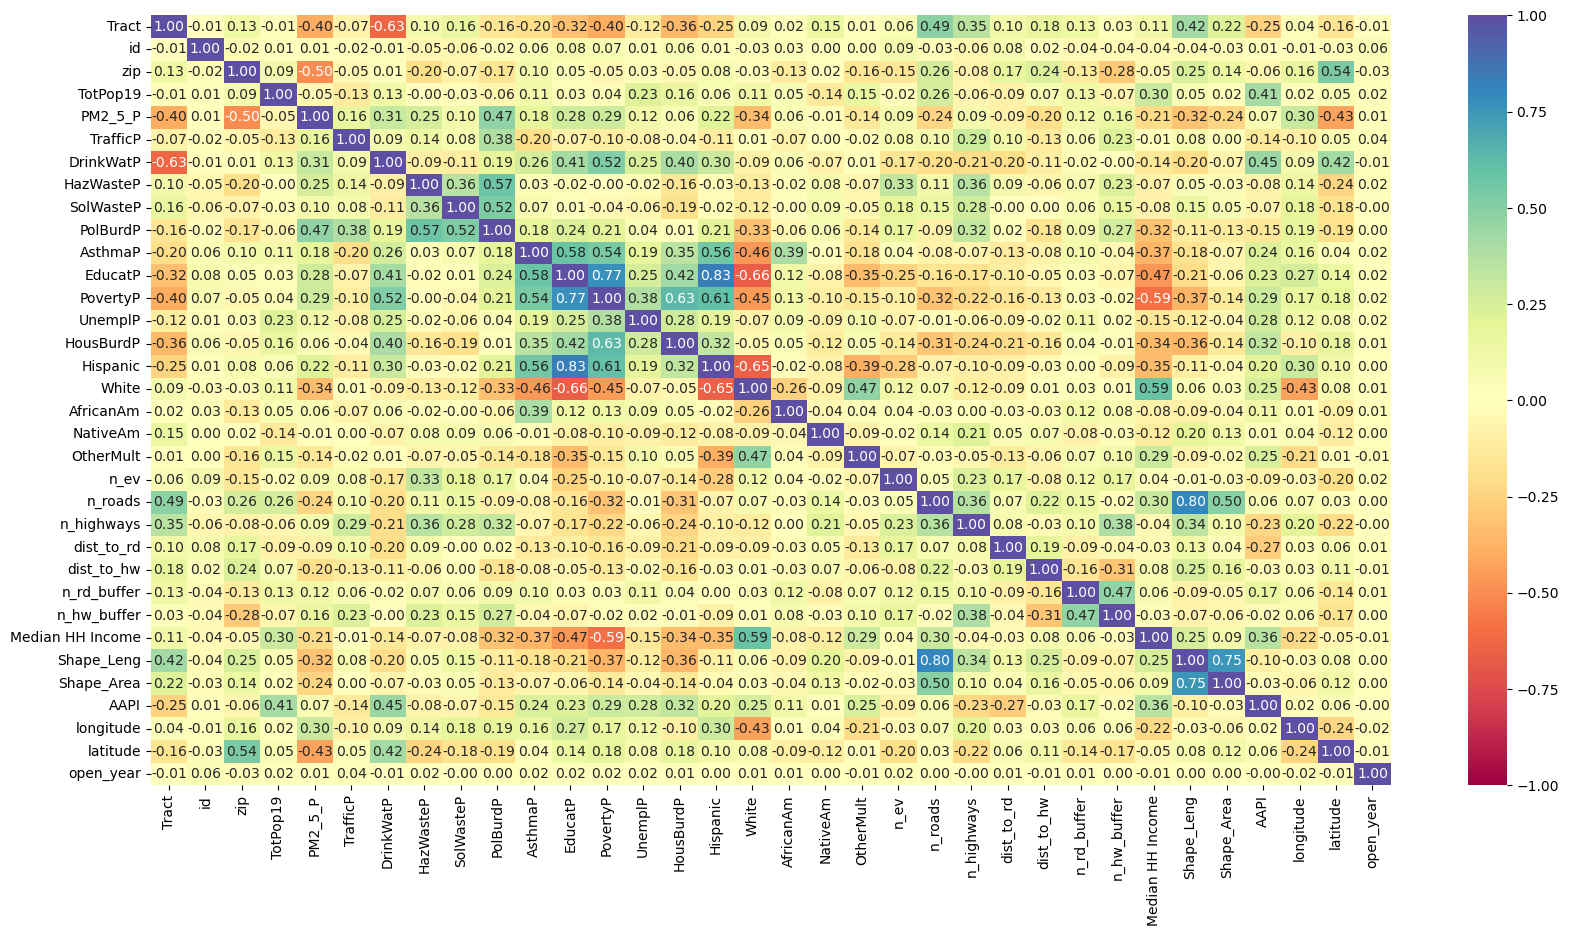

In [ ]:
# Finding the correlation between various columns of the dataset

plt.figure(figsize = (20,10))

sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "Spectral")

### **Data Preparation for Model Building**

In [10]:
## Separating independent variables and the target variable ##

# Define x variables

xvars = ["PM2_5_P", "TrafficP", "DrinkWatP", "HazWasteP", "SolWasteP",
       "PolBurdP", "AsthmaP", "EducatP", "PovertyP", "UnemplP", "HousBurdP",
       "n_roads", "n_highways", "dist_to_rd", "dist_to_hw",
       "n_rd_buffer", "n_hw_buffer", "Median HH Income", "open_year"]

x = df[xvars]

# Define y variable

yvar = "n_ev"

y = df[yvar]

# fit the data
df_to_fit = df[xvars+[yvar]].dropna()

In [11]:
# Splitting the dataset into train and test datasets

x_train, x_test, y_train, y_test = train_test_split(df_to_fit[xvars], df_to_fit[yvar], test_size = 0.25, shuffle = True, random_state = 1)

# Checking the shape of the train and the test data

print("Shape of Training set : ", x_train.shape)

print("Shape of test set : ", x_test.shape)

Shape of Training set :  (2871, 19)
Shape of test set :  (957, 19)


### **Model building**

* We will be using different metrics functions defined in sklearn like RMSE, MAE, and 𝑅2 for regression model evaluation.
* We will define a function to calculate MAPE and the adjusted 𝑅2.
* The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage and can be calculated as the average absolute percent error for each predicted value minus the actual value divided by the actual value. It works best if there are no extreme values in the data and none of the actual values are 0.

In [12]:
# Function to compute the adjusted R-squared

def adj_r2_score(predictors, targets, predictions):
    
    r2 = r2_score(targets, predictions)
    
    n = predictors.shape[0]
    
    k = predictors.shape[1]
    
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Function to compute MAPE

def mape_score(targets, predictions):
    
    return np.mean(np.abs(targets - predictions) / targets) * 100


# Function to compute different metrics to check performance of a regression model

def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    
    predictors: independent variables
    
    target: dependent variable
    """

    # Predicting using the independent variables
    
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)                      # To compute R-squared
    
    adjr2 = adj_r2_score(predictors, target, pred)   # To compute adjusted R-squared
    
    rmse = np.sqrt(mean_squared_error(target, pred)) # To compute RMSE
    
    mae = mean_absolute_error(target, pred)          # To compute MAE
    
    mape = mape_score(target, pred)                  # To compute MAPE

    # Creating a dataframe of metrics
    
    df_perf = pd.DataFrame(
        {
            "RMSE":  rmse,
            "MAE":  mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        
        index = [0],
    )

    return df_perf

In [13]:
# RMSE

def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE

def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE

def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model performance on the test and the train data

def model_pref(olsmodel, x_train, x_test, y_train,y_test):

    # Prediction on the training data
    
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on the test data
    
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test),
                ],
                
                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test),
                ],
                
                "MAPE": [
                    mape(y_pred_train, y_observed_train),
                    mape(y_pred_test, y_observed_test),
                ],
            }
        )
    ) 

### Random Forest Regressor (Model 1)

In [14]:
rf_tuned = RandomForestRegressor(random_state = 1)

# Grid of parameters to choose from

parameters = {"n_estimators": [110, 120],
              
    "max_depth": [5, 7],
              
    "max_features": [0.8, 1]
             }

# Type of scoring used to compare parameter combinations

scorer = make_scorer(r2_score)

# Run the grid search

grid_obj = GridSearchCV(rf_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(x_train, y_train)

# Set the rf_tuned_regressor to the best combination of parameters

rf_tuned_regressor = grid_obj.best_estimator_

rf_tuned_regressor.fit(x_train, y_train)

RandomForestRegressor(max_depth=7, max_features=0.8, n_estimators=120,
                      random_state=1)

In [15]:
# Look at the different between actual and predicted values 

y_pred = rf_tuned_regressor.predict(x_test)

rf_predict_df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

rf_predict_df.head()

Actual  Predicted
2343       5  10.656702
3248      25  23.881545
194        8   8.864724
17         8  20.074065
3214       1   5.909665

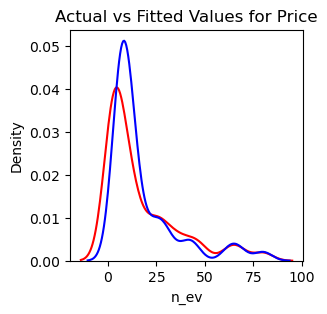

In [16]:
# Plot Actual vs Fitted Values

plt.figure(figsize=(3, 3))


ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')


plt.show()

# Note: Blue = prediction line / Red = actual 

In [17]:
# Model Performance on the test data

rf_tuned_regressor_perf_test = model_performance_regression(rf_tuned_regressor, x_test, y_test)

rf_tuned_regressor_perf_test

RMSE       MAE  R-squared  Adj. R-squared        MAPE
0  5.861453  3.970799    0.91154        0.909746  131.470267

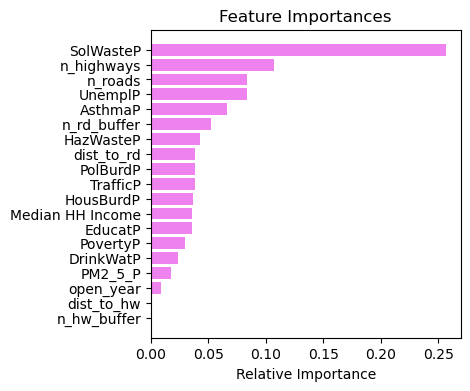

In [18]:
# Plot the feature importances

features = list(x.columns)

importances = rf_tuned_regressor.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (4, 4))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

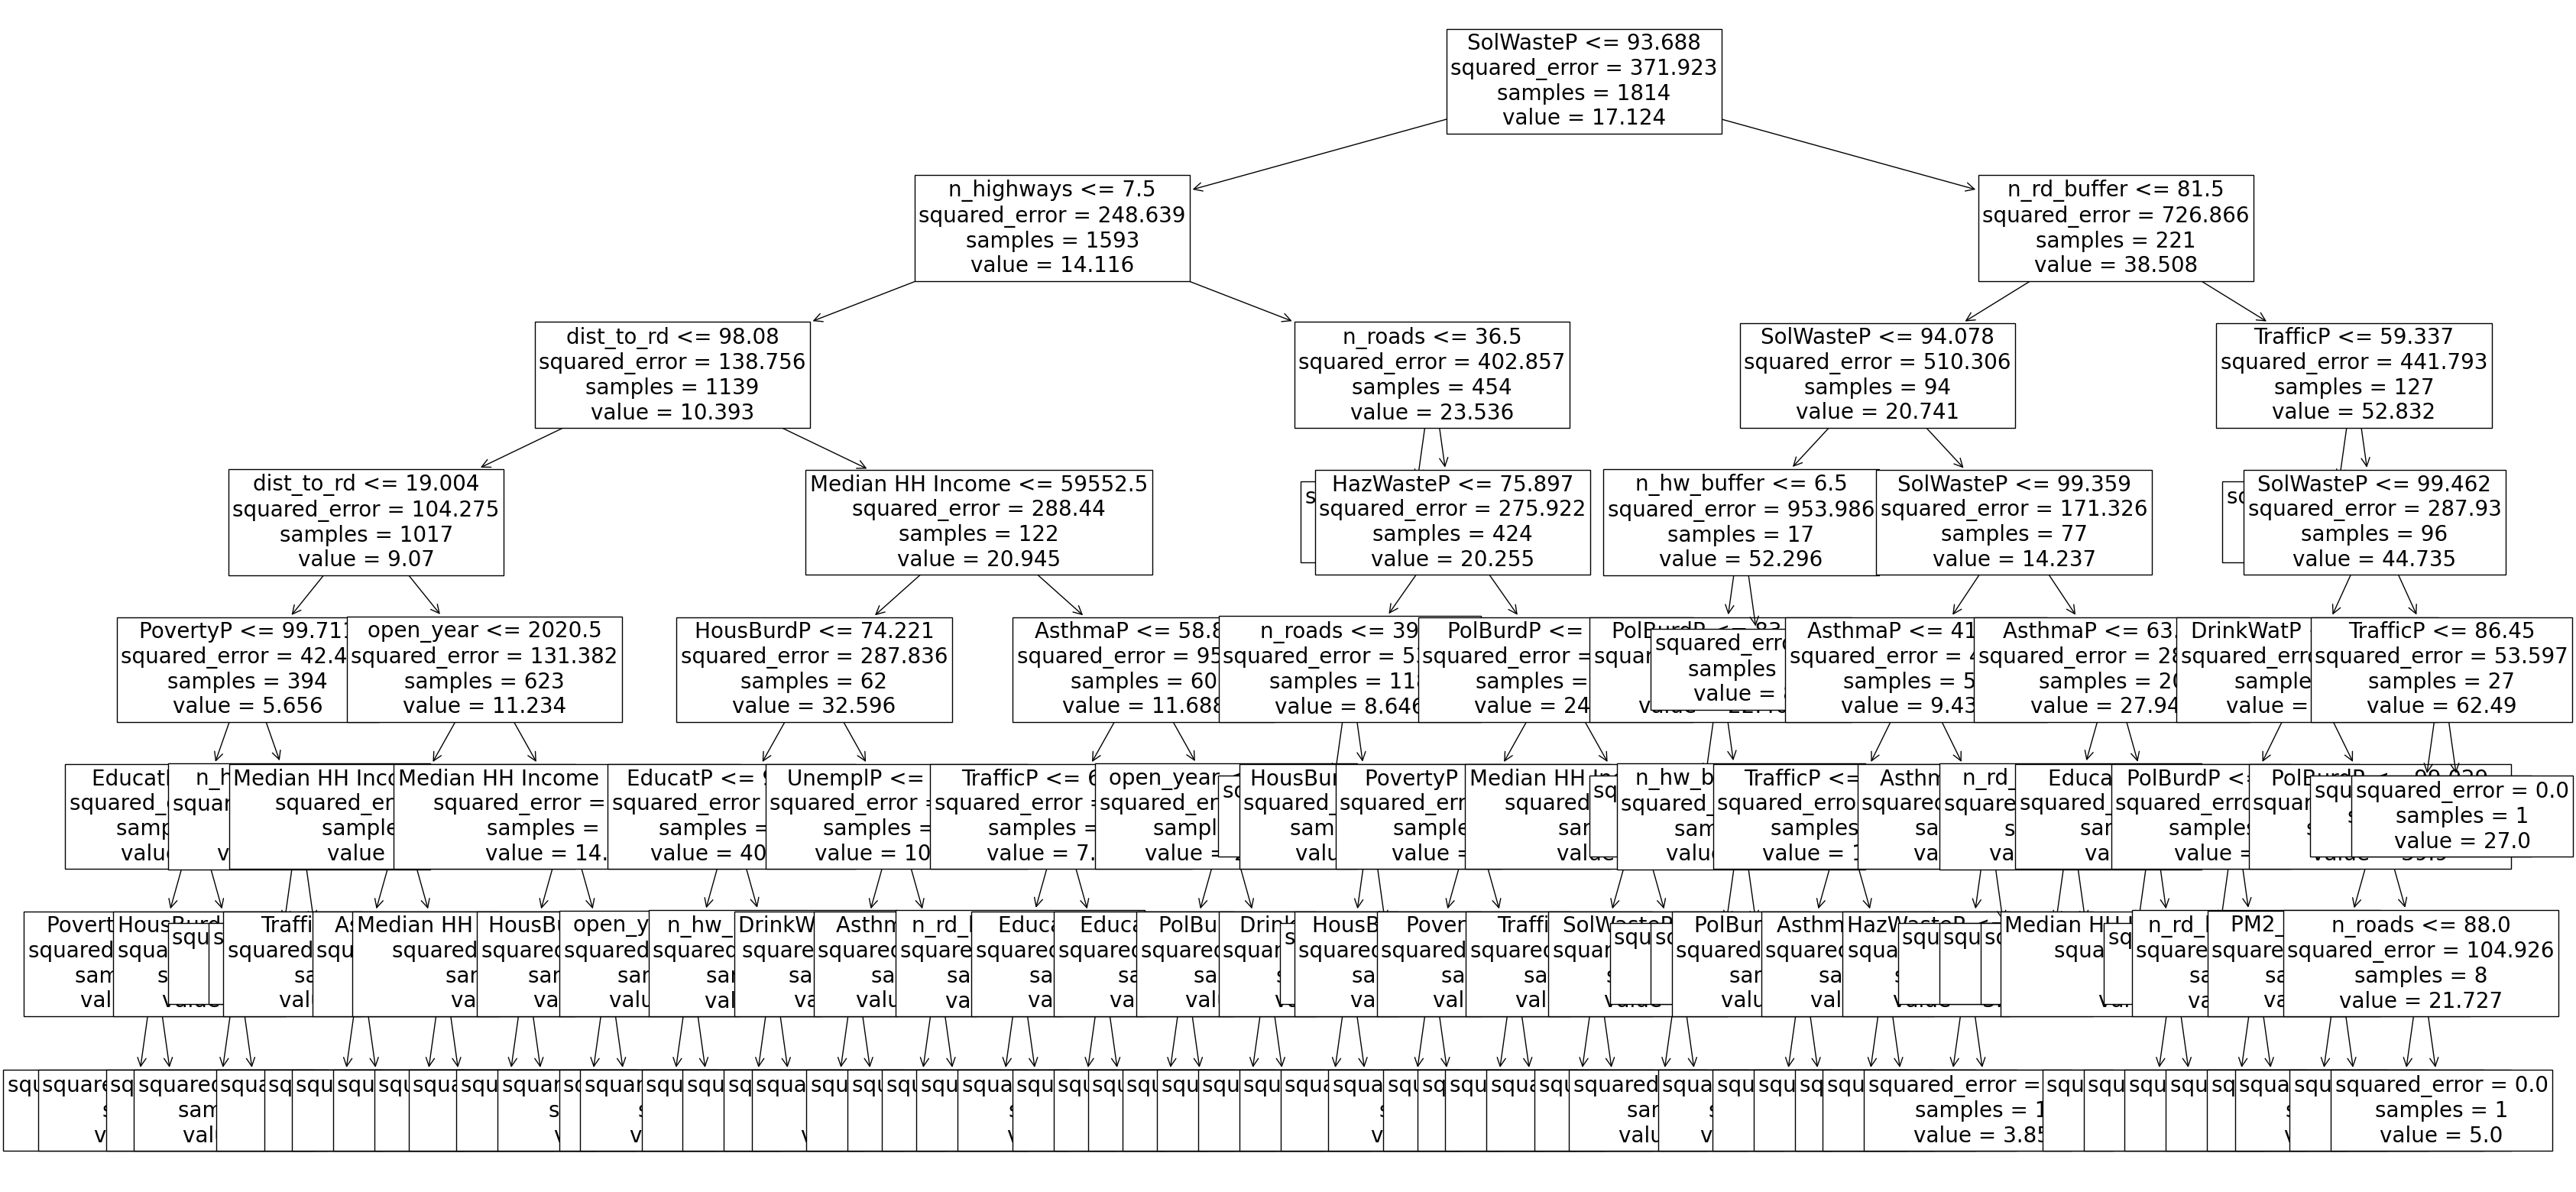

In [ ]:
# now we have over 100 estimators (trees), let's pick the first one to visualize

from sklearn import tree

import matplotlib.pyplot as plt

e = rf_tuned_regressor.estimators_[0]

fig, ax = plt.subplots(figsize=(40,20))  

_ = tree.plot_tree(e, feature_names = x_train.columns, fontsize=20, ax = ax)

### Random Forest Regressor (Model 2) - Dropping SolWasteP

In [29]:
# Define x variables

xvars = ["PM2_5_P", "TrafficP", "DrinkWatP", "HazWasteP",
       "PolBurdP", "AsthmaP", "EducatP", "PovertyP", "UnemplP", "HousBurdP",
       "n_roads", "n_highways", "dist_to_rd", "dist_to_hw",
       "n_rd_buffer", "n_hw_buffer", "Median HH Income", "open_year"]

x = df[xvars]

# Define y variable

yvar = "n_ev"

y = df[yvar]

# fit the data

df_to_fit = df[xvars+[yvar]].dropna()

In [30]:
# Splitting the dataset into train and test datasets

x_train, x_test, y_train, y_test = train_test_split(df_to_fit[xvars],
                                                    df_to_fit[yvar],
                                                    test_size = 0.25, 
                                                    shuffle = True, 
                                                    random_state = 1)

# Checking the shape of the train and the test data

print("Shape of Training set : ", x_train.shape)

print("Shape of test set : ", x_test.shape)

Shape of Training set :  (2871, 18)
Shape of test set :  (957, 18)


In [31]:
rf_tuned_model2 = RandomForestRegressor(random_state = 1)

# Grid of parameters to choose from

parameters = {"n_estimators": [110, 120],
              
    "max_depth": [5, 7],
              
    "max_features": [0.8, 1]
             }

# Type of scoring used to compare parameter combinations

scorer = make_scorer(r2_score)

# Run the grid search

grid_obj = GridSearchCV(rf_tuned_model2, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(x_train, y_train)

# Set the rf_tuned_regressor to the best combination of parameters

rf_tuned_regressor_model2 = grid_obj.best_estimator_

rf_tuned_regressor_model2.fit(x_train, y_train)

RandomForestRegressor(max_depth=7, max_features=0.8, n_estimators=120,
                      random_state=1)

In [37]:
# Look at the different between actual and predicted values 

y_pred = rf_tuned_regressor_model2.predict(x_test)

rf_predict_df_model2 = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

rf_predict_df_model2.head()

Actual  Predicted
2343       5   6.807858
3248      25  23.816669
194        8  10.095414
17         8  17.025642
3214       1   8.672713

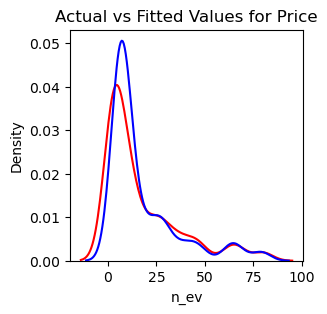

In [33]:
# Plot Actual vs Fitted Values

plt.figure(figsize=(3, 3))


ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')


plt.show()

# Note: Blue = prediction line / Red = actual 

In [34]:
# Model Performance on the test data

rf_tuned_regressor_perf_test = model_performance_regression(rf_tuned_regressor_model2, x_test, y_test)

rf_tuned_regressor_perf_test

RMSE       MAE  R-squared  Adj. R-squared        MAPE
0  3.974872  2.882589    0.95932        0.958539  104.865937

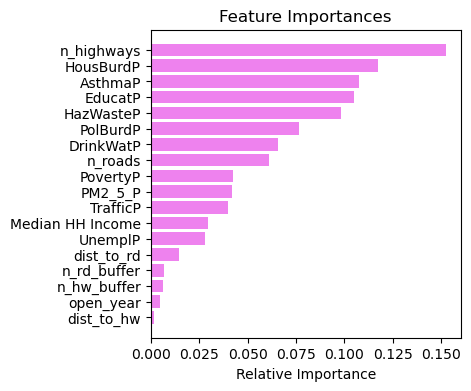

In [35]:
# Plot the feature importances

features = list(x.columns)

importances = rf_tuned_regressor_model2.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (4, 4))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

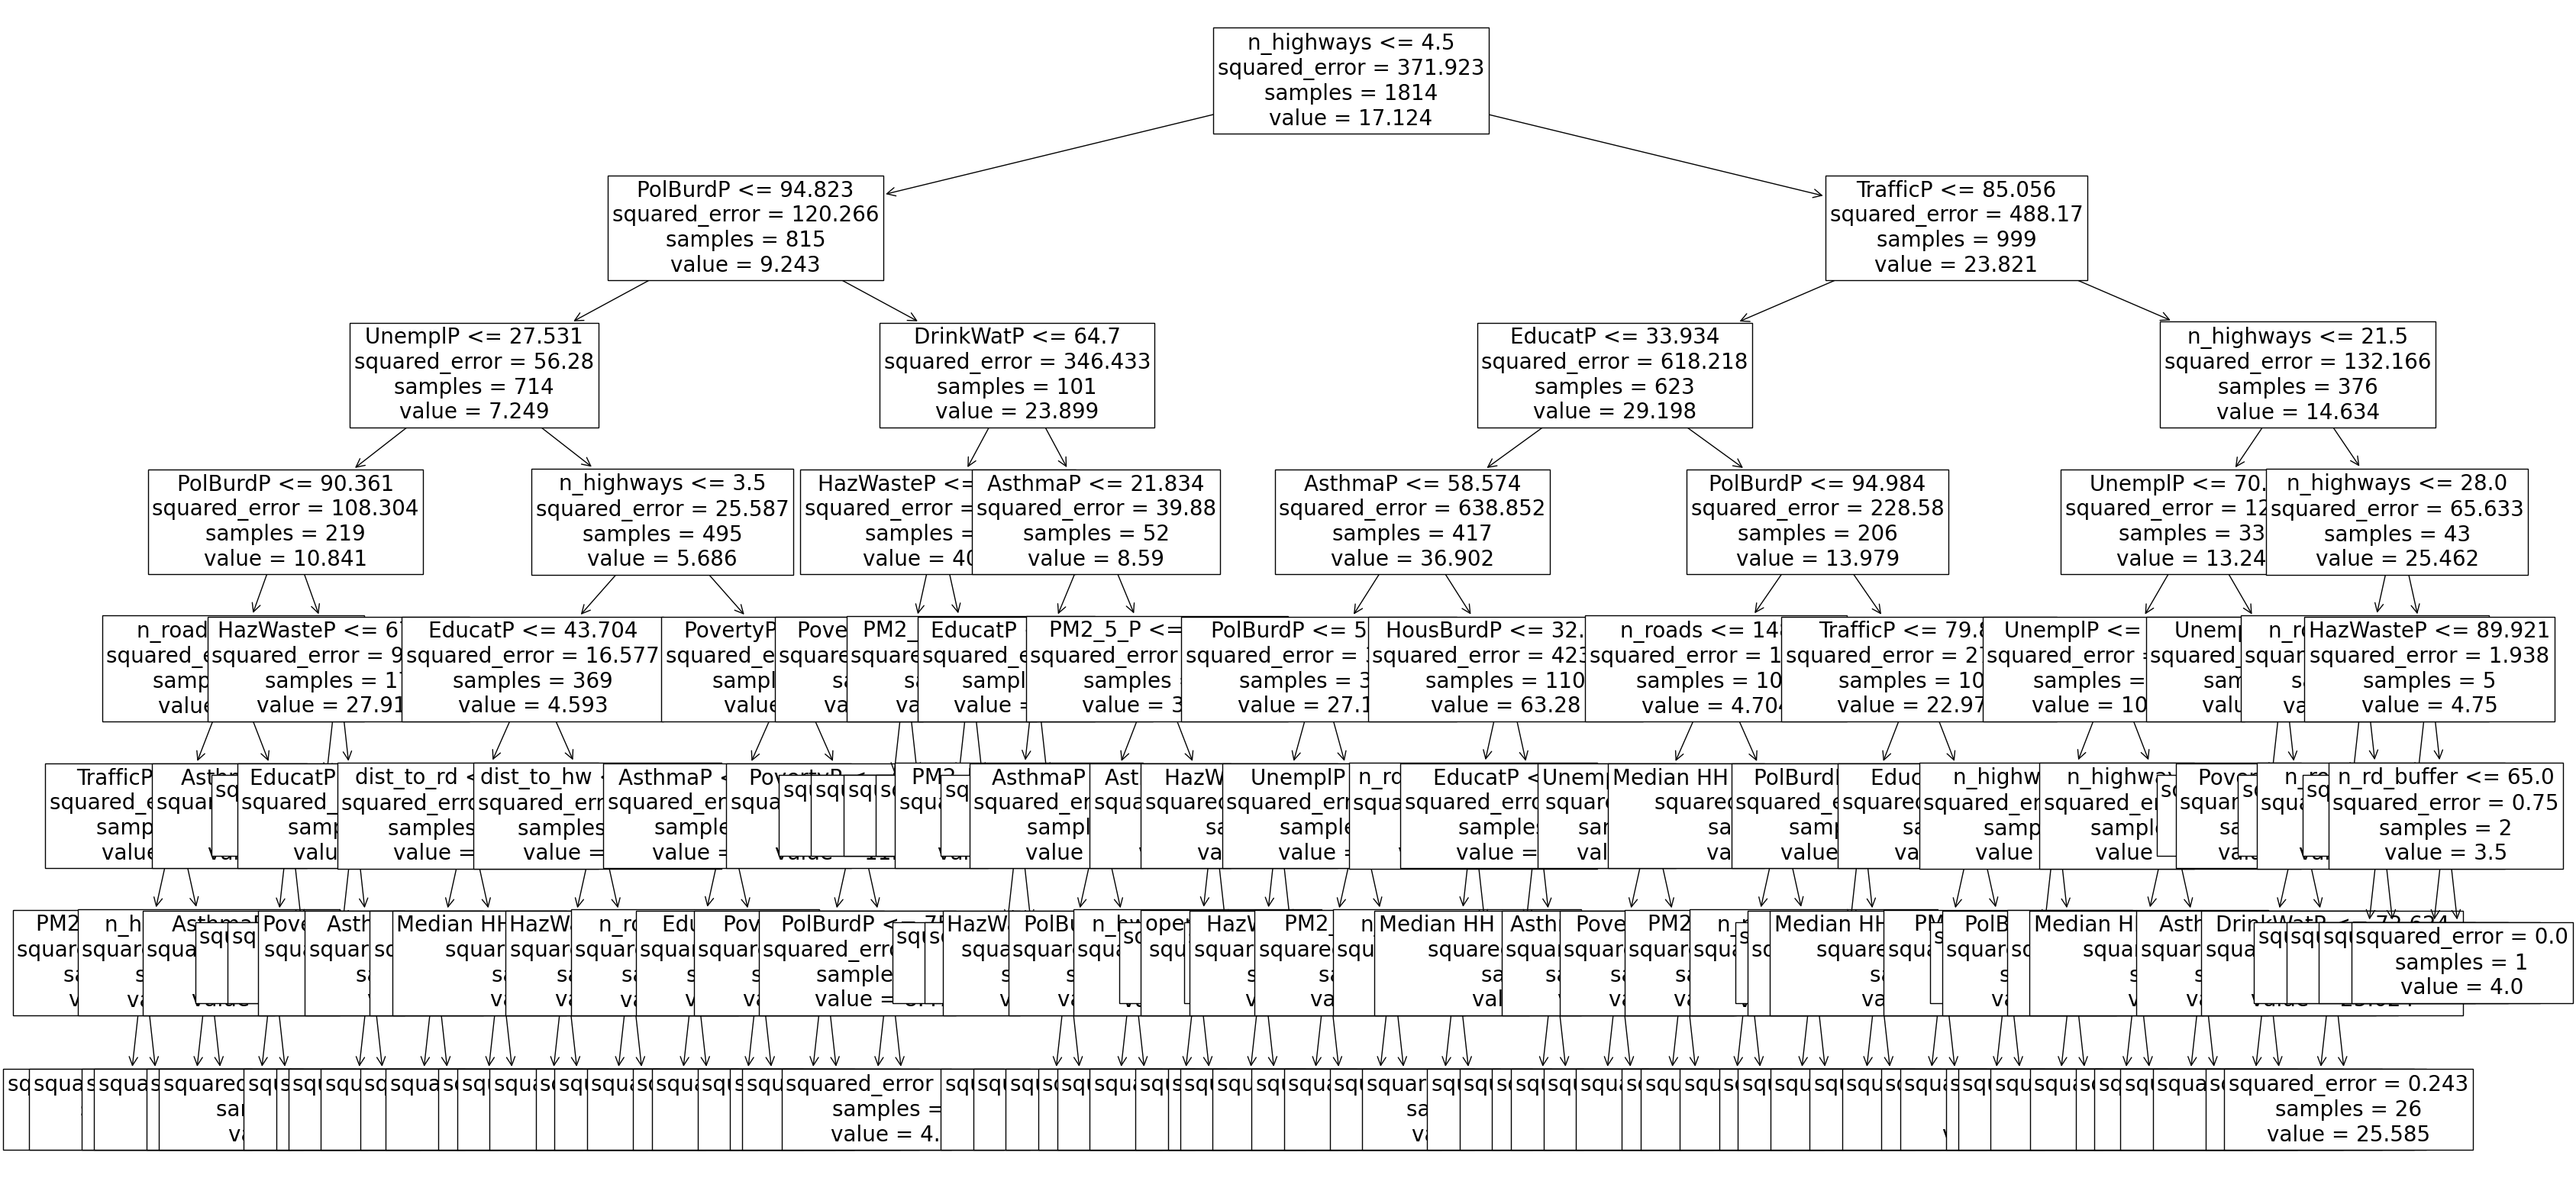

In [ ]:
# now we have over 100 estimators (trees), let's pick the first one to visualize

e = rf_tuned_regressor_model2.estimators_[0]

fig, ax = plt.subplots(figsize=(40,20))  

_ = tree.plot_tree(e, feature_names = x_train.columns, fontsize=20, ax = ax)

#### Observation:

**Model 1:** The model exhibits higher RMSE, MAE, and R-square scores compared to other models such as linear regression and decision tree regressor. However, upon closer examination of the significant features, it becomes evident that the model lacks insightful information. The variable SolWasteP (Solid Waste Percentage) emerges as the most significant feature for predicting the concentration of EV charging stations, but its practical implementation poses challenges.

**Model 2:** In order to enhance the model's performance, we decided to remove the SolWasteP variable due to its potential impact on the scale or accuracy of the predictions. As anticipated, this removal led to significant improvements in the RMSE, MAE, and R-square scores, thereby enhancing the accuracy of our predictions.

#### Feature Importances:

**n_highways:** The presence of a high density of highways has a substantial impact on the concentration of EV charging stations.

**AsthmaP:** People who live near highways are more likely to have asthma due to the higher levels of air pollution in that area, which coincides with a higher number of EV stations.

**HousBurdP:** The variable "HousBurdP" represents the percentile of low-income households that are burdened by housing costs. It is possible that this phenomenon is linked to the tendency of low-income households to reside in proximity to highways, as well as the fact that EV stations are often established in locations near highways.

**PolBurdP:** A higher pollution translates to a higher population density. Consequently, areas with a greater number of pollution instances contribute to the concentration of EV charging stations.

**We can use scatter plot to see the relationship between significant features and the number of highways**

In [47]:
# Look at the location with more than 25 stations

df['more_than_25stations'] = df['n_ev'].apply(lambda x: 1 if x >= 30 else 0)

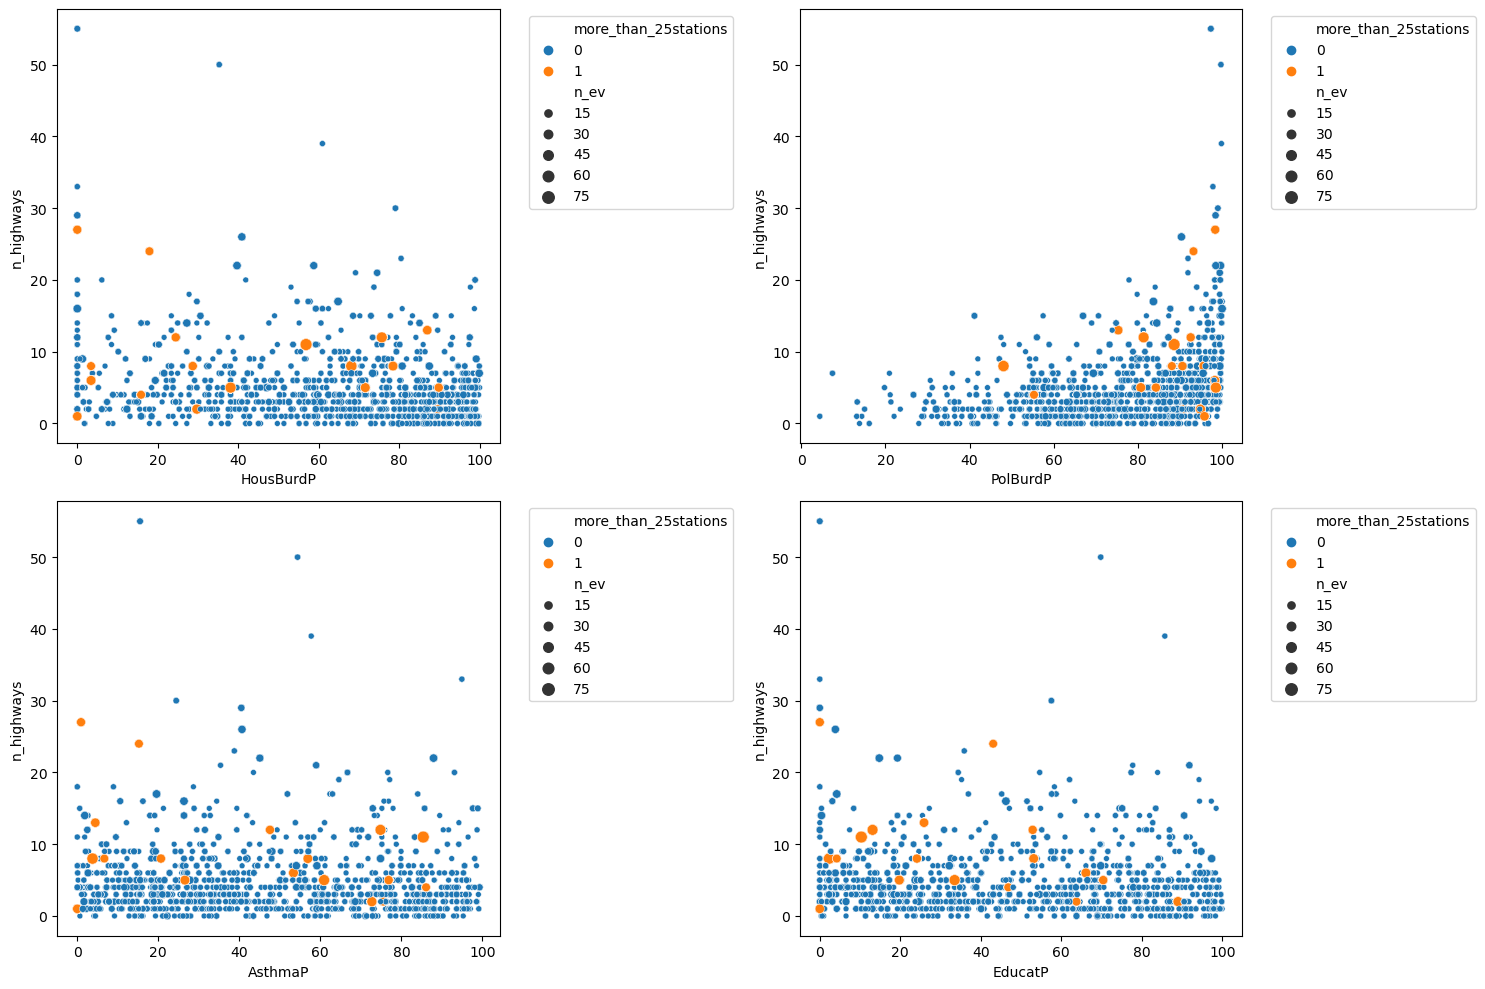

In [59]:
# Plot

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

sns.scatterplot(data = df, ax = axs[0,0],
                y = 'n_highways',
                x = 'HousBurdP',
                hue = 'more_than_25stations',
                size = 'n_ev')

sns.scatterplot(data = df, ax = axs[0,1],
                y = 'n_highways',
                x = 'PolBurdP',
                hue = 'more_than_25stations',
                size = 'n_ev')

sns.scatterplot(data = df, ax = axs[1,0],
                y = 'n_highways',
                x = 'AsthmaP',
                hue = 'more_than_25stations',
                size = 'n_ev')

sns.scatterplot(data = df, ax = axs[1,1],
                y = 'n_highways',
                x = 'EducatP',
                hue = 'more_than_25stations',
                size = 'n_ev')

# Move the legends to the right and outside of the subplots

for ax in axs.flatten():
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

---------
# VI. Conclusion
---------

The analysis reveals that electric vehicle (EV) stations are primarily situated in areas with a high concentration of highways and population. This finding suggests that both the public and private sectors strategically establish EV stations in locations where they anticipate a high demand for charging infrastructure. Furthermore, we can infer that transportation infrastructures play a significant role in determining the construction of EV stations. Through machine learning techniques, we have further substantiated this by demonstrating that variables such as the number of highways and roads are important factors in determining the presence of EV stations. Certain variables such as a higher percentage of housing burden, higher pollution burden, and a higher Asthma percentile exhibit a strong relationship with the number of EV stations. This may be attributed to the positive association between higher poverty levels, air pollution, and the existence of transportation infrastructures.  In the future, it would be beneficial for these sectors to conduct a detailed analysis of EV station characteristics based on usage patterns. This analysis would shed light on the key features that attract users to these stations. By understanding these factors, stakeholders can optimize resource allocation and funding for EV station installation. This proactive approach is crucial, as it allows for more efficient utilization of resources, ensuring that charging stations are installed in locations where they are most needed. Additionally, it allows for identifying underutilized charging stations that may be impacted by various constraints. Overall, such analysis and optimization efforts will contribute to the development of a more efficient and effective EV charging infrastructure.